# Import Libraries 

In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Read Dataset

In [2]:
df=pd.read_csv('E:/Dataset/SVM_Data.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [5]:
df.isna().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

# Data Visualization

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

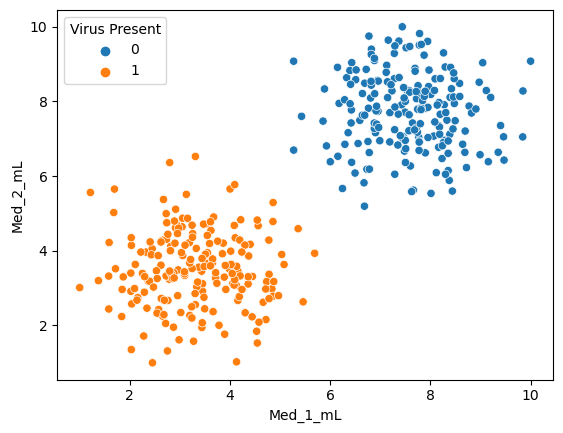

In [6]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

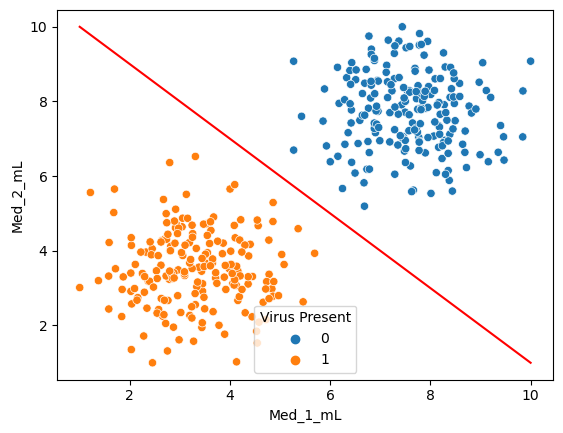

In [7]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

# hyperplane ---> line
x=np.linspace(1,10,100)
m=-1
b=11
#Linear equation
y=m*x+b
plt.plot(x,y,color='red')

# Splitting Data 

In [8]:
# splittin data nto features and labels
x=df.drop('Virus Present',axis=1)
y=df['Virus Present']

In [9]:
# splitting data into train & test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Building SVM model

# 1-Linear SVM

# 1-Linear Kernel

In [10]:
#call svm on linear kernel 
svm_model=SVC(kernel='linear')
# fit Svm on training data 
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

E:\anacond222\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


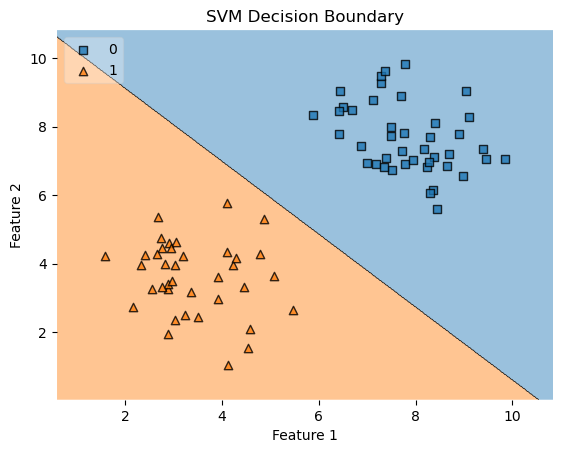

In [11]:
# converting x_train,y_train to array 
x_test=np.array(x_test)
y_test=np.array(y_test)
# plot decision boundary 
plot_decision_regions(x_test,y_test,clf=svm_model,legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

# 2-ploy kernel

E:\anacond222\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


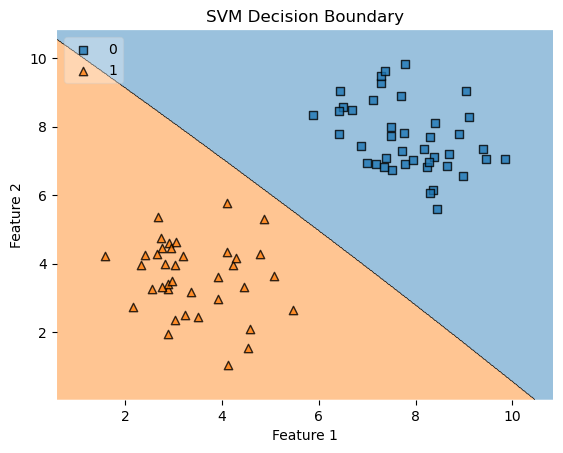

In [12]:
#call svm on poly kernel 
svm_model=SVC(kernel='poly',degree =2)
# fit the model 
svm_model.fit(x_train,y_train)

# converting x_train,y_train to array 
x_test=np.array(x_test)
y_test=np.array(y_test)
# plot decision boundary 
plot_decision_regions(x_test,y_test,clf=svm_model,legend=2)
# adding axws annotations
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

# 3- rbf kernel

E:\anacond222\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


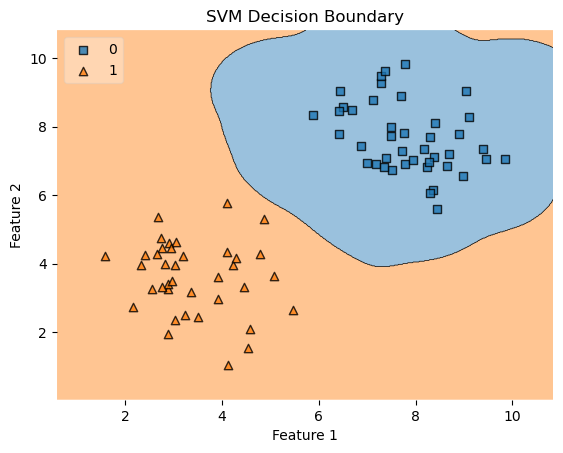

In [14]:
#call svm on rbf kernel 
svm_model=SVC(kernel='rbf',C=1,gamma=2)
# fit the model 
svm_model.fit(x_train,y_train)

# converting x_train,y_train to array 
x_test=np.array(x_test)
y_test=np.array(y_test)
# plot decision boundary 
plot_decision_regions(x_test,y_test,clf=svm_model,legend=2)
# adding axws annotations
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

# 4-sigmoid kernel

E:\anacond222\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


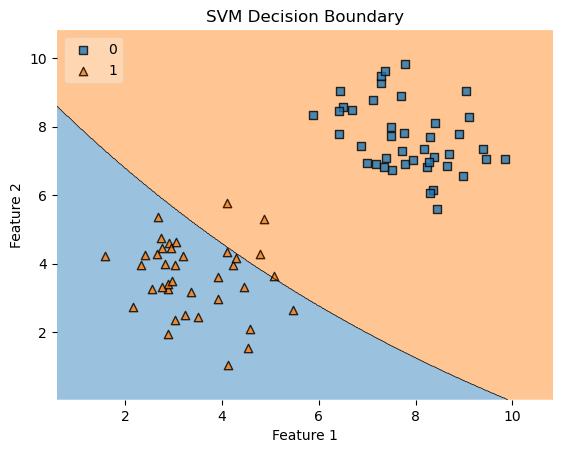

In [15]:
#call svm on sigmoid kernel 
svm_model=SVC(kernel='sigmoid')
# fit the model 
svm_model.fit(x_train,y_train)
# converting x_train,y_train to array 
x_test=np.array(x_test)
y_test=np.array(y_test)
# plot decision boundary 
plot_decision_regions(x_test,y_test,clf=svm_model,legend=2)
# adding axws annotations
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

 ## Hyperparammeter tuning 

In [16]:
model=SVC()
params={
    'C':[0.1,0.001,1.0],
    'kernel':['linear','poly','rbf','sigmoid']
}

In [19]:
gs_model=GridSearchCV(model,params)
gs_model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [20]:
print(gs_model.best_params_)

{'C': 0.1, 'kernel': 'linear'}


In [ ]:
print(gs_model.best_score_)

In [21]:
svm_model=SVC(C= 0.1,kernel= 'linear')
svm_model.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

In [22]:
y_pred=svm_model.predict(x_test)

E:\anacond222\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Model Evaluation 

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [24]:
cm=confusion_matrix(y_test,y_pred)
cm


array([[42,  0],
       [ 0, 38]], dtype=int64)